

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/support_vector_machine/svm.ipynb)


# **University of Electronic Science and Technology of China (UESTC)**
# School of information and Software Engineerinig

## **Project of the Course: New Theory and Practice of Database** 0908357012

# **NAME: EJIYI, CHUKWUEBUKA JOSEPH** 
# **STUDENT ID: 202114090102**


---










# Support Vector Machine (SVM) Classification


## What I want to achieve

I want to build a Support Vector Machine (SVM) that will find the optimal hyperplane that maximizes the margin between two toy data classes using gradient descent.  

![alt text](http://opticalengineering.spiedigitallibrary.org/data/journals/optice/24850/oe_52_2_027003_f005.png "Logo Title Text 1")


## Here are some use cases for SVMs

-Classification, regression (time series prediction, etc) , outlier detection, as well as clustering


## Comparison of SVM to other Machine Learning (ML) algorithms

![alt text](https://image.slidesharecdn.com/mscpresentation-140722065852-phpapp01/95/msc-presentation-bioinformatics-7-638.jpg?cb=1406012610 "Logo Title Text 1")

- As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers. 
- Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.
- The decision of which classifier to use has a strong relationship with the available dataset as well as the general complexity of the problem.


## General idea of Support Vector Machine?

It's a supervised machine learning algorithm that can be used to solve both classification and/or regression problems. But it has been shown that SVM favours use for classification over regression. 

Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that seperates all the classes. New examples that are then mapped into that same space can then be categorized based on on which side of the gap they fall.

## Support Vectors

![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")
 
Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help in building the SVM. 

## The hyperplane

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry said that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with dimension n − 1. By its nature, it separates the space into two half spaces.

## I will define the loss function (what to minimize) and the objective function (what to optimize)

#### The Loss Function

I will use the Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")


c is the loss function, x the sample, y is the true label, f(x) the predicted label.

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")

 
#### The Objective Function

![alt text](http://i.imgur.com/I5NNu44.png "Logo Title Text 1")

As you can see, the objective of a SVM consists of two terms. The first term is a regularizer, this is the heart of the SVM, the second term is the loss. The regularizer balances between margin maximization and loss. The target is to find the decision surface that is maximally far away from any data points.

How do I minimize the loss/optimize the objective (i.e learn)?

I have to derive the objective function to get the gradients! Gradient descent ftw.  As we have two terms, I will try to derive them seperately using the sum rule in differentiation.


![alt text](http://i.imgur.com/6uK3BnH.png "Logo Title Text 1")

This means, if I have a misclassified sample, the weight vector wis updated using the gradients of both terms, else if classified correctly, the weight w is updated by the gradient of the regularizer.







Misclassification condition 

![alt text](http://i.imgur.com/g9QLAyn.png "Logo Title Text 1")

Update rule for our weights (misclassified)

![alt text](http://i.imgur.com/rkdPpTZ.png "Logo Title Text 1")

including the learning rate η and the regularizer λ
The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.
- If the learning rate too high, usually the algorithm will overshoot the optimal point.
- If the learning rate on the hand is too low, it could take too long to converge or it never did converge.

The regularizer controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize the classifier to unseen data. As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.
- In the case where the regularizer too high, it will usually overfit ( that is, large testing error).
- But in the case where the regularizer too low, it will usually underfit (that is, large training error). 

Update rule for the weights (correctly classified)

![alt text](http://i.imgur.com/xTKbvZ6.png "Logo Title Text 1")


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'
df = pd.read_csv(url)  # Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})  # Label values - 1 for Malignant and 2 for Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Cpying values of diagnosis to newly clreated labels column
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Dropping unncessary columns
df.head()  #Displaying first five rows of the dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
target_names = ['', 'M', 'B']
df['attack_type'] = df.Class.apply(lambda x: target_names[x])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,M


In [4]:
df1 = df[df.Class == 1]
df2 = df[df.Class == 2]

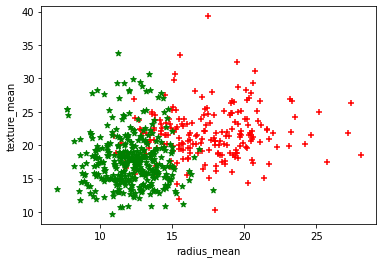

In [21]:
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.scatter(df1['radius_mean'], df1['texture_mean'], color='red', marker='+')
plt.scatter(df2['radius_mean'], df2['texture_mean'], color='green', marker='*')

In [11]:
X = df.drop(['Class', 'attack_type'], axis='columns')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y = df.Class

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
print(len(X_train))
print(len(X_test))

398
171


In [15]:
model = SVC(kernel='linear')

In [16]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
predictions = model.predict(X_test)
print(predictions)

[2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 2 2 1 2 2 2
 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 2 1 1 2 2 2 1 2
 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1
 2 2 2 1 1 1 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2
 2 1 2 1 2 1 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 2 1]


In [19]:
percentage = model.score(X_test, y_test)

In [20]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[ 57   8]
 [  2 104]]
Test Set: 171
Accuracy = 94.15204678362574 %
